In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
from matplotlib import animation
import matplotlib
import numpy
import pickle

In [2]:
import os
os.environ['PROJ_LIB'] = '~/miniconda3/envs/ccl/share/proj/'
from mpl_toolkits.basemap import Basemap

In [3]:
with open('pickles/largest.pickle', 'rb') as f:
    largest = pickle.load(f)

with open('pickles/timestamps.pickle', 'rb') as f:
    timestamps = pickle.load(f)

In [6]:
largest = numpy.ma.masked_where(largest==0, largest)

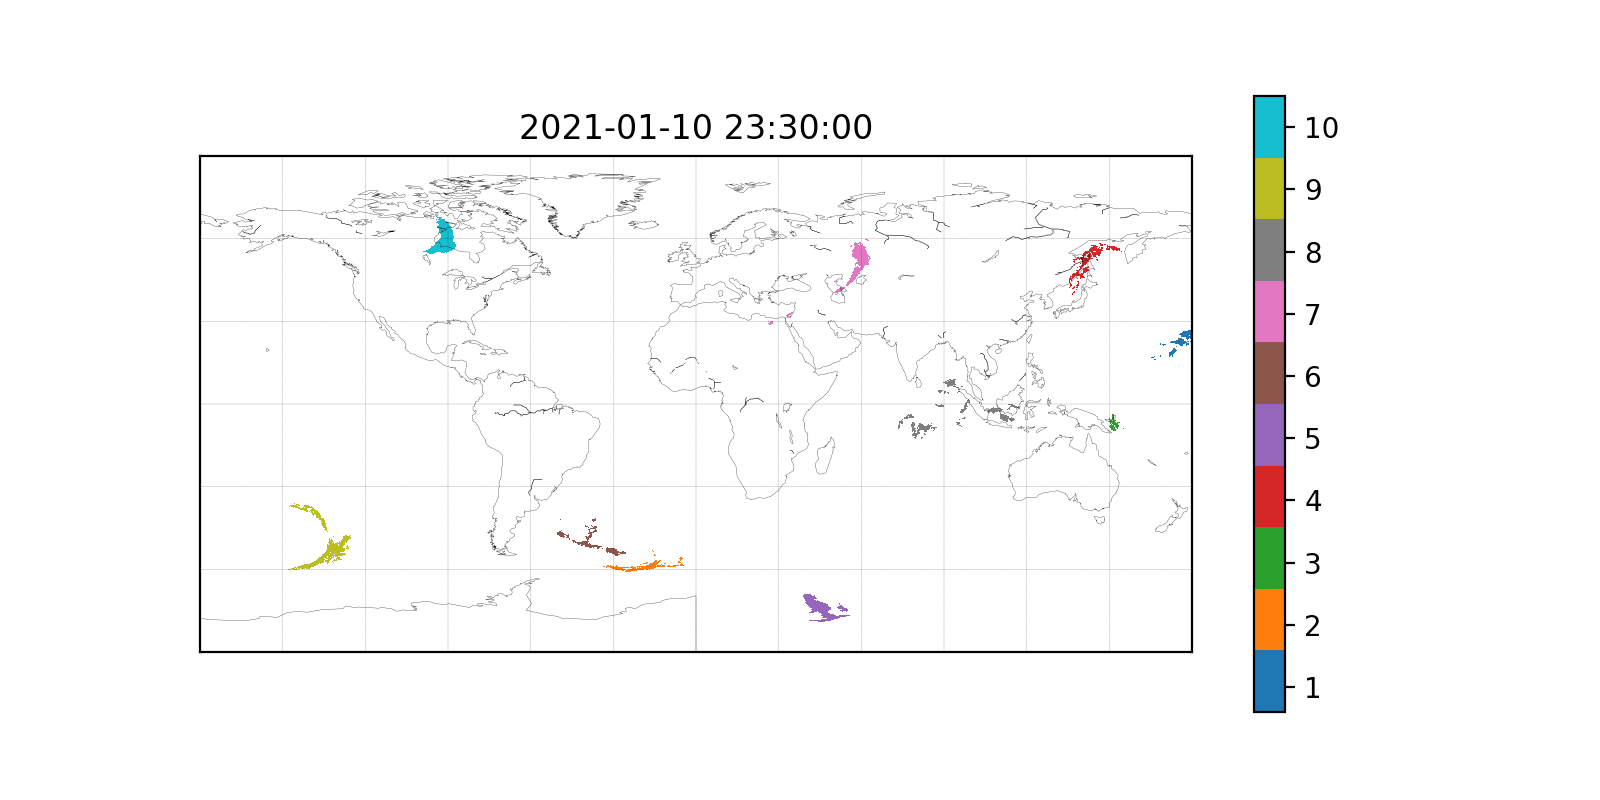

In [7]:
fig = plt.figure(figsize=(8, 4), dpi=200)
ax = fig.add_subplot(111)
plot_data = largest

m = Basemap(projection='cyl')
m.drawcoastlines(0.1)

m.drawparallels(numpy.arange(-90.,120.,30.), linewidth=0.1)
m.drawmeridians(numpy.arange(0, 360, 30), linewidth=0.1)


im = m.imshow(plot_data[0], 
              cmap='tab10',
              interpolation='none',
              extent=[-180, 180, -90,90])

def animate(i):    
    im.set_array(plot_data[i])    
    ax.set_title(timestamps[i])
    return [im]

anim = animation.FuncAnimation(fig,
                               animate,                                
                               frames=len(plot_data),
                               interval=100, # in ms
                               blit=True,
                               repeat=True)

cbar = fig.colorbar(im, ax=ax, orientation='vertical')
cbar.set_ticks(numpy.arange(1.5,11.5,1) *10/11, labels=numpy.arange(1,11,1))


#text(x, y, s, fontdict=None, withdash=False, **kwargs)
anim.save('animations/10_largest.gif', fps=20)
anim.save('animations/10_largest.mp4', fps=20)